In [14]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health (1).csv")

# Lihat 5 baris pertama
print(data.head())


  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2             

In [15]:
target_conditions = ['Depression', 'Anxiety', 'Burnout']
data['Mental_Health_Condition_Binary'] = data['Mental_Health_Condition'].apply(
    lambda x: 1 if x in target_conditions else 0
)


In [16]:
features = ['Gender', 'Work_Location', 'Stress_Level', 'Age', 'Hours_Worked_Per_Week']
X = data[features]
y = data['Mental_Health_Condition_Binary']


In [17]:
X_encoded = pd.get_dummies(X, columns=['Gender', 'Work_Location', 'Stress_Level'], drop_first=True)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded[['Age', 'Hours_Worked_Per_Week']] = scaler.fit_transform(X_encoded[['Age', 'Hours_Worked_Per_Week']])


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.76      1.00      0.87       763

    accuracy                           0.76      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.58      0.76      0.66      1000

Confusion Matrix:
 [[  0 237]
 [  0 763]]


c:\Users\WINDOWS-10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WINDOWS-10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WINDOWS-10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


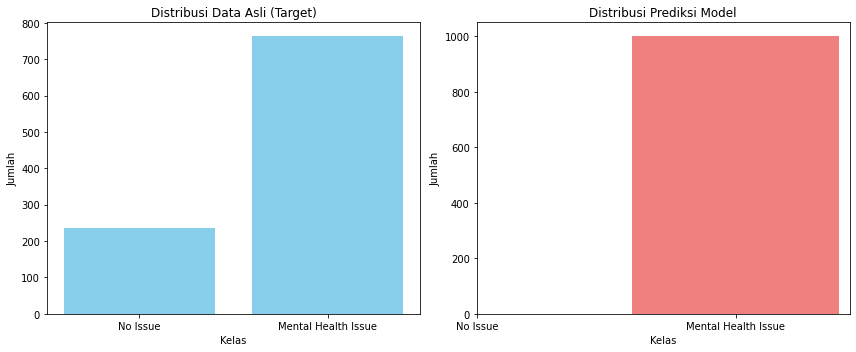

In [29]:
import matplotlib.pyplot as plt

# Membuat grafik perbandingan target sebenarnya dan prediksi
y_test_value_counts = y_test.value_counts()
y_pred_value_counts = pd.Series(y_pred).value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Grafik distribusi data asli
ax[0].bar(y_test_value_counts.index, y_test_value_counts.values, color='skyblue')
ax[0].set_title('Distribusi Data Asli (Target)')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['No Issue', 'Mental Health Issue'])
ax[0].set_ylabel('Jumlah')
ax[0].set_xlabel('Kelas')

# Grafik distribusi prediksi
ax[1].bar(y_pred_value_counts.index, y_pred_value_counts.values, color='lightcoral')
ax[1].set_title('Distribusi Prediksi Model')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['No Issue', 'Mental Health Issue'])
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Kelas')

plt.tight_layout()
plt.show()


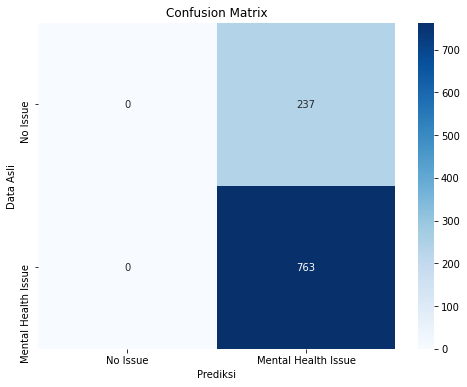

In [30]:
import seaborn as sns

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Issue', 'Mental Health Issue'], yticklabels=['No Issue', 'Mental Health Issue'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Data Asli')
plt.show()


In [26]:
# Menyimpan dataset hasil pra-pemrosesan
processed_data = pd.concat([X_encoded, y], axis=1)
processed_data.to_csv("processed_data.csv", index=False)
print("Data pra-pemrosesan telah disimpan sebagai 'processed_data.csv'")


Data pra-pemrosesan telah disimpan sebagai 'processed_data.csv'


In [27]:
# Menyimpan hasil prediksi
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred
results.to_csv("prediction_results.csv", index=False)
print("Hasil prediksi telah disimpan sebagai 'prediction_results.csv'")


Hasil prediksi telah disimpan sebagai 'prediction_results.csv'


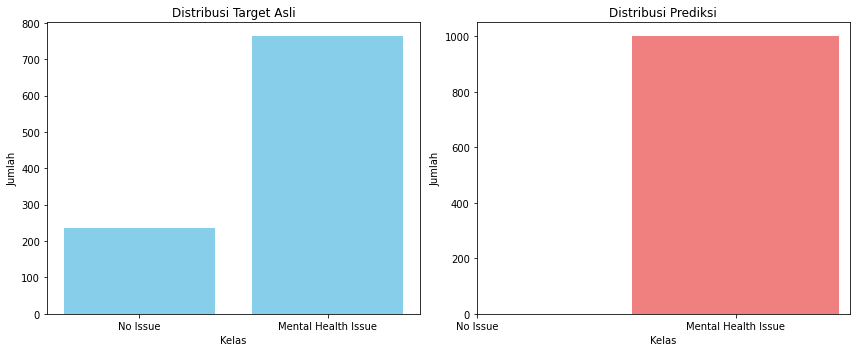

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat grafik perbandingan
y_test_value_counts = pd.Series(y_test).value_counts().sort_index()
y_pred_value_counts = pd.Series(y_pred).value_counts().sort_index()

# Membuat subplot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Grafik distribusi target asli
ax[0].bar(y_test_value_counts.index, y_test_value_counts.values, color='skyblue')
ax[0].set_title('Distribusi Target Asli')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['No Issue', 'Mental Health Issue'])
ax[0].set_ylabel('Jumlah')
ax[0].set_xlabel('Kelas')

# Grafik distribusi prediksi
ax[1].bar(y_pred_value_counts.index, y_pred_value_counts.values, color='lightcoral')
ax[1].set_title('Distribusi Prediksi')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['No Issue', 'Mental Health Issue'])
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Kelas')

plt.tight_layout()
plt.show()


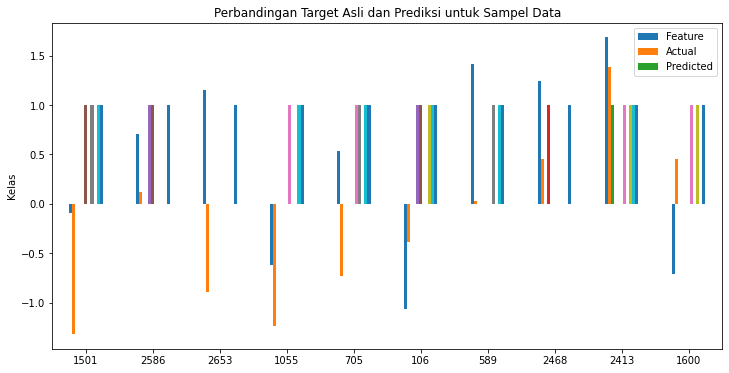

In [31]:
# Membandingkan hasil prediksi dengan target asli
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred

# Visualisasi sampel data
sample_results = results.head(10)  # Contoh 10 data pertama
sample_results.plot(kind='bar', figsize=(12, 6))
plt.title('Perbandingan Target Asli dan Prediksi untuk Sampel Data')
plt.ylabel('Kelas')
plt.xticks(rotation=0)
plt.legend(['Feature', 'Actual', 'Predicted'])
plt.show()
